In [98]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

Morality: ἀγαθός (good), ἀλήθεια (truth), ἀληθής (unconcealed, true), ἀρετή (virtue, moral excellence, perfection), δίκαιος (just, righteous, impartial), δίκη (justice, judicial hearing, punishment) 
Power: δύναμις (might, power, marvelous works), δυνατός (powerful, able, possible), εἷς (one), μέγας (large, great), μόνος (only, solitary, desolate) 
Impusivity (heroism): βία (force, violence), δεινός (fearful, terrible, dread, dire), θυμός (an outburst of passion, wrath), μάχη (strife, contention, quarrel), πόλεμος (a war, battle, strife), χαλεπός (hard, harsh, ﬁerce

In [9]:
data_arc = pickle.load(open("../data/large_files/embeddings_Archaic.pkl", "rb"))
data_cla = pickle.load(open("../data/large_files/embeddings_Classical.pkl", "rb"))
data_hel = pickle.load(open("../data/large_files/embeddings_Hellenistic.pkl", "rb"))
data_rom = pickle.load(open("../data/large_files/embeddings_Roman.pkl", "rb"))
data_chr = pickle.load(open("../data/large_files/embeddings_Christian.pkl", "rb"))
data_jew = pickle.load(open("../data/large_files/embeddings_Jewish.pkl", "rb"))

In [77]:
data_rom = pickle.load(open("../data/large_files/embeddings_Roman.pkl", "rb"))

In [11]:
data_embedds = [data_arc, data_cla, data_hel, data_chr, data_jew]

In [20]:
pd.DataFrame(data_arc[0].todense(), columns=data_arc[1], index=data_arc[1]).head(10)

,εἰμί,αὐτός,πᾶς,ἀνήρ,πολύς,φημί,ἔχω,θεός,Ζεύς,μέγας,...,θησαυρός,πτηνός,παρασκευάζω,περιτυγχάνω,σωτηρία,ταὐτός,ὠφελέω,δίαιτα,ἀποβάλλω,περιστερά
εἰμί,0.115452,0.009316,0.009462,0.010682,0.009999,0.004731,0.004829,0.010145,0.006438,0.006731,...,0.000098,0.000195,0.000000,0.000049,0.000049,0.000000,0.000000,0.000049,0.000049,0.000098
αὐτός,0.009316,0.074432,0.005512,0.004048,0.004926,0.003658,0.004829,0.004243,0.003707,0.003658,...,0.000098,0.000146,0.000146,0.000049,0.000049,0.000049,0.000049,0.000146,0.000000,0.000098
πᾶς,0.009462,0.005512,0.065408,0.004341,0.003122,0.003902,0.004243,0.006877,0.004000,0.003219,...,0.000049,0.000098,0.000049,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000000
ἀνήρ,0.010682,0.004048,0.004341,0.059799,0.006926,0.002585,0.004146,0.005951,0.003658,0.004000,...,0.000049,0.000049,0.000000,0.000000,0.000049,0.000000,0.000098,0.000000,0.000000,0.000000
πολύς,0.009999,0.004926,0.003122,0.006926,0.054482,0.001658,0.003073,0.002585,0.003073,0.003268,...,0.000000,0.000000,0.000098,0.000000,0.000000,0.000000,0.000049,0.000000,0.000049,0.000000
φημί,0.004731,0.003658,0.003902,0.002585,0.001658,0.055068,0.001756,0.001951,0.001853,0.001756,...,0.000000,0.000000,0.000000,0.000098,0.000049,0.000049,0.000098,0.000000,0.000049,0.000000
ἔχω,0.004829,0.004829,0.004243,0.004146,0.003073,0.001756,0.050580,0.004634,0.002244,0.002731,...,0.000049,0.000000,0.000049,0.000098,0.000000,0.000000,0.000000,0.000049,0.000000,0.000000
θεός,0.010145,0.004243,0.006877,0.005951,0.002585,0.001951,0.004634,0.048629,0.006048,0.003805,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000,0.000000
Ζεύς,0.006438,0.003707,0.004000,0.003658,0.003073,0.001853,0.002244,0.006048,0.046678,0.004682,...,0.000000,0.000000,0.000098,0.000000,0.000049,0.000000,0.000000,0.000000,0.000049,0.000000
μέγας,0.006731,0.003658,0.003219,0.004000,0.003268,0.001756,0.002731,0.003805,0.004682,0.046093,...,0.000000,0.000000,0.000000,0.000000,0.000049,0.000000,0.000049,0.000000,0.000000,0.000000


In [23]:
data_arc[2].head(10)

,εἰμί,αὐτός,πᾶς,ἀνήρ,πολύς,φημί,ἔχω,θεός,Ζεύς,μέγας,...,θησαυρός,πτηνός,παρασκευάζω,περιτυγχάνω,σωτηρία,ταὐτός,ὠφελέω,δίαιτα,ἀποβάλλω,περιστερά
εἰμί,1.000000,0.835766,0.839830,0.850298,0.847871,0.795787,0.799163,0.851502,0.820946,0.824317,...,0.636036,0.686487,0.000000,0.588019,0.588019,0.000000,0.000000,0.588019,0.588019,0.636036
αὐτός,0.835766,1.000000,0.812526,0.793222,0.808969,0.788104,0.809300,0.801257,0.792839,0.792212,...,0.646173,0.676694,0.676694,0.598156,0.598156,0.598156,0.600589,0.674261,0.000000,0.646173
πᾶς,0.839830,0.812526,1.000000,0.801041,0.780348,0.795559,0.803333,0.837690,0.801087,0.786341,...,0.601140,0.651590,0.603573,0.000000,0.000000,0.601140,0.000000,0.000000,0.000000,0.000000
ἀνήρ,0.850298,0.793222,0.801041,1.000000,0.837626,0.769107,0.803792,0.829734,0.796976,0.803448,...,0.603210,0.605643,0.000000,0.000000,0.603210,0.000000,0.653660,0.000000,0.000000,0.000000
πολύς,0.847871,0.808969,0.780348,0.837626,1.000000,0.740504,0.785194,0.774128,0.787047,0.791603,...,0.000000,0.000000,0.655810,0.000000,0.000000,0.000000,0.607793,0.000000,0.605360,0.000000
φημί,0.795787,0.788104,0.795559,0.769107,0.740504,1.000000,0.746180,0.754387,0.751779,0.748325,...,0.000000,0.000000,0.000000,0.653131,0.605114,0.605114,0.655564,0.000000,0.605114,0.000000
ἔχω,0.799163,0.809300,0.803333,0.803792,0.785194,0.746180,1.000000,0.816272,0.766977,0.780896,...,0.607076,0.000000,0.609509,0.655094,0.000000,0.000000,0.000000,0.607076,0.000000,0.000000
θεός,0.851502,0.801257,0.837690,0.829734,0.774128,0.754387,0.816272,1.000000,0.836581,0.804758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.607985,0.000000,0.000000,0.000000,0.000000
Ζεύς,0.820946,0.792839,0.801087,0.796976,0.787047,0.751779,0.766977,0.836581,1.000000,0.820088,...,0.000000,0.000000,0.659380,0.000000,0.608930,0.000000,0.000000,0.000000,0.608930,0.000000
μέγας,0.824317,0.792212,0.786341,0.803448,0.791603,0.748325,0.780896,0.804758,0.820088,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.609222,0.000000,0.611655,0.000000,0.000000,0.000000


In [24]:
data_arc[3].head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
εἰμί,23.605322,12.321675,-2.225459,3.214366,-0.878877,-0.218519,-1.284003,1.079598,0.303093,-0.514914,...,-0.233833,-0.243442,-0.804276,0.260531,0.157347,-0.392750,0.233030,-0.122246,-0.579080,0.592556
αὐτός,22.997787,11.630106,-0.080014,3.984577,-0.602825,0.565574,-1.210638,1.251771,-0.238408,-0.350716,...,0.164025,-0.270588,0.480358,0.825666,-0.139993,-0.263300,-0.219957,-0.211866,-0.100200,-0.334190
πᾶς,22.062637,10.664699,-1.258545,2.592296,0.098873,-0.250656,-0.145305,0.906072,0.289859,-1.166846,...,0.325749,-0.056946,0.427040,-0.579340,0.029189,0.711334,0.371571,0.554077,0.715739,-0.946874
ἀνήρ,21.621429,10.048726,-0.473233,0.910563,-0.848386,-0.734610,-0.087514,1.137381,0.853316,-0.056926,...,0.466970,-0.627794,-0.182482,0.356129,-0.428624,-0.233718,0.547263,0.801898,0.460697,0.146438
πολύς,21.661080,10.078178,-0.570334,2.454007,-0.346975,-0.205337,0.340212,1.209615,0.819686,-0.485202,...,-0.639465,-0.291254,0.203012,0.837623,0.796827,0.005244,-1.033707,-0.275358,0.216113,0.077525
φημί,18.170686,6.801645,-0.040650,1.922341,-0.718735,1.564366,-2.178226,0.046334,-2.087550,0.210582,...,-0.116719,0.567462,-0.003412,-0.248743,0.189788,-0.343164,0.259201,-0.103916,0.490363,-0.257051
ἔχω,21.173077,9.662434,-0.103185,2.890300,0.621591,-0.580949,-0.936182,0.542251,0.333477,-0.116320,...,-0.337982,0.018769,0.573519,-1.111807,0.304588,-1.003703,-0.720237,-0.862555,-0.084235,-0.617835
θεός,19.903704,8.262758,-3.203190,-0.145719,0.619015,-1.419685,-1.185576,-0.091463,-0.437050,-1.734710,...,0.486124,0.207642,-0.209811,-0.498290,0.374823,0.434266,0.580642,-0.103883,-0.371922,-0.294035
Ζεύς,20.163043,8.417384,-1.066384,-0.025980,0.991737,-2.040802,-2.035467,0.085096,0.510627,-2.022061,...,-0.775225,-0.572198,0.617784,-0.554329,-0.206426,1.081159,-0.675299,-0.217868,0.320061,-0.045745
μέγας,20.860701,9.184039,1.280872,2.054666,0.749576,-1.821007,-0.869374,0.567128,0.810193,-0.248632,...,0.245178,0.393478,-0.215071,0.029738,-0.640157,0.327545,-0.101735,1.133605,0.320964,0.301254


In [25]:
data_arc[4].head(10)

,εἰμί,αὐτός,πᾶς,ἀνήρ,πολύς,φημί,ἔχω,θεός,Ζεύς,μέγας,...,θησαυρός,πτηνός,παρασκευάζω,περιτυγχάνω,σωτηρία,ταὐτός,ὠφελέω,δίαιτα,ἀποβάλλω,περιστερά
εἰμί,1.000000,0.939643,0.922159,0.917886,0.913456,0.814767,0.894321,0.878861,0.855583,0.880005,...,0.234776,0.279827,0.235887,0.250119,0.235285,0.238216,0.216386,0.253114,0.260399,0.206888
αὐτός,0.939643,1.000000,0.904815,0.879708,0.899947,0.825926,0.887324,0.842967,0.828530,0.866766,...,0.229383,0.266880,0.279900,0.259127,0.223642,0.257252,0.218214,0.250401,0.235959,0.242230
πᾶς,0.922159,0.904815,1.000000,0.865698,0.872867,0.787042,0.861865,0.863535,0.840972,0.867756,...,0.235247,0.259444,0.246174,0.210205,0.216861,0.233780,0.212172,0.216966,0.221212,0.165591
ἀνήρ,0.917886,0.879708,0.865698,1.000000,0.884053,0.770009,0.857107,0.837400,0.821961,0.856209,...,0.222731,0.236576,0.203054,0.217416,0.228305,0.201075,0.193383,0.201741,0.201648,0.143912
πολύς,0.913456,0.899947,0.872867,0.884053,1.000000,0.785146,0.833938,0.814599,0.832321,0.861334,...,0.216920,0.225041,0.267645,0.222761,0.204875,0.226223,0.222487,0.222826,0.243961,0.172656
φημί,0.814767,0.825926,0.787042,0.770009,0.785146,1.000000,0.783033,0.749951,0.755708,0.771267,...,0.221972,0.237078,0.269398,0.252851,0.214559,0.286644,0.205741,0.226150,0.244524,0.184186
ἔχω,0.894321,0.887324,0.861865,0.857107,0.833938,0.783033,1.000000,0.827460,0.798936,0.829456,...,0.232098,0.225924,0.250902,0.243861,0.209994,0.219103,0.192993,0.239357,0.232086,0.177474
θεός,0.878861,0.842967,0.863535,0.837400,0.814599,0.749951,0.827460,1.000000,0.840597,0.825277,...,0.193860,0.199591,0.238549,0.204926,0.197837,0.224881,0.202410,0.202747,0.230434,0.178195
Ζεύς,0.855583,0.828530,0.840972,0.821961,0.832321,0.755708,0.798936,0.840597,1.000000,0.835101,...,0.199391,0.209353,0.244842,0.191452,0.206698,0.178416,0.145598,0.231172,0.245309,0.158893
μέγας,0.880005,0.866766,0.867756,0.856209,0.861334,0.771267,0.829456,0.825277,0.835101,1.000000,...,0.201969,0.207103,0.191779,0.200835,0.190876,0.212031,0.184349,0.201416,0.200522,0.186487


In [15]:
n = 20
theos_nn = {}
for data, label in zip([data_arc, data_cla, data_chr], ["Arc.", "Cla", "Chr"]):
    data_sorted = data[-1].sort_values("θεός", ascending=False)
    theos_nn[label + " θεός NNs"] = data_sorted.index.tolist()[1:n+1]
    theos_nn[label + " θεός CoS."] = data_sorted["θεός"].tolist()[1:n+1]

In [16]:
pd.DataFrame(theos_nn)

,Arc. θεός NNs,Arc. θεός CoS.,Cla θεός NNs,Cla θεός CoS.,Chr θεός NNs,Chr θεός CoS.
0,εἰμί,0.878861,πόλις,0.851322,λέγω,0.984858
1,πᾶς,0.863535,παῖς,0.843691,πᾶς,0.983901
2,αὐτός,0.842967,ἀνήρ,0.842644,οὗτος,0.981143
3,Ζεύς,0.840597,Ζεύς,0.840899,εἰμί,0.980016
4,ἀνήρ,0.837400,λέγω,0.827235,αὐτός,0.977154
5,ἔχω,0.827460,αὐτός,0.824137,γίγνομαι,0.974447
6,μέγας,0.825277,πᾶς,0.820234,λόγος,0.974422
7,ἄλλος,0.823009,μέγας,0.816109,ἄνθρωπος,0.964595
8,πολύς,0.814599,φημί,0.816051,πολύς,0.958449
9,ἀθάνατος,0.795998,πατήρ,0.813952,φημί,0.955182


In [38]:
morality = ["ἀγαθός", "ἀλήθεια", "ἀληθής", "ἀρετή", "δίκαιος", "δίκη"]
# power = ["δύναμις", "δυνατός", "εἷς", "μέγας", "μόνος"]
impulsivity = ["βία", "δεινός", "θυμός", "μάχη", "πόλεμος", "χαλεπός"]

In [33]:
data_arc_theos = data_arc[-1]["θεός"].sort_values(ascending=False)
data_cla_theos = data_cla[-1]["θεός"].sort_values(ascending=False)
data_chr_theos = data_chr[-1]["θεός"].sort_values(ascending=False)

In [48]:
ranks_dict = {}
for data, label in zip([data_arc_theos, data_cla_theos, data_chr_theos], ["Archaic", "Classical", "Christian"]): 
    ranks = []
    for word in morality:
        if word in data.index:
            rank = data.index.get_loc(word)
        else:
            rank = None
        ranks.append(rank)
    ranks_dict[label + " ({0})".format(str(len(data)))] = ranks
ranks_dict
theos_morality_rank = pd.DataFrame(ranks_dict, index=morality).T
theos_morality_rank

,ἀγαθός,ἀλήθεια,ἀληθής,ἀρετή,δίκαιος,δίκη
Archaic (2266),31,1861,1138,484,780,348
Classical (10405),24,262,132,78,55,53
Christian (9681),38,59,110,97,91,184


In [51]:
ranks_dict = {}
for data, label in zip([data_arc_theos, data_cla_theos, data_chr_theos], ["Archaic", "Classical", "Christian"]): 
    ranks = []
    for word in impulsivity:
        if word in data.index:
            rank = data.index.get_loc(word)
        else:
            rank = None
        ranks.append(rank)
    ranks_dict[label + " ({0})".format(str(len(data)))] = ranks
ranks_dict
theos_impulsivity_rank = pd.DataFrame(ranks_dict, index=impulsivity).T
theos_impulsivity_rank

,βία,δεινός,θυμός,μάχη,πόλεμος,χαλεπός
Archaic (2266),125,123,12,158,57,345
Classical (10405),169,98,389,223,76,204
Christian (9681),1126,348,512,744,240,534


In [67]:
theos_morality_rank_w = theos_morality_rank.div([len(data_arc_theos), len(data_cla_theos), len(data_chr_theos)], axis=0)
theos_morality_rank_w

,ἀγαθός,ἀλήθεια,ἀληθής,ἀρετή,δίκαιος,δίκη
Archaic (2266),0.013680,0.821271,0.502207,0.213592,0.344219,0.153575
Classical (10405),0.002307,0.025180,0.012686,0.007496,0.005286,0.005094
Christian (9681),0.003925,0.006094,0.011362,0.010020,0.009400,0.019006


In [68]:
theos_impulsivity_rank_w = theos_impulsivity_rank.div([len(data_arc_theos), len(data_cla_theos), len(data_chr_theos)], axis=0)
theos_impulsivity_rank_w

,βία,δεινός,θυμός,μάχη,πόλεμος,χαλεπός
Archaic (2266),0.055163,0.054281,0.005296,0.069726,0.025154,0.152251
Classical (10405),0.016242,0.009419,0.037386,0.021432,0.007304,0.019606
Christian (9681),0.116310,0.035947,0.052887,0.076852,0.024791,0.055160


In [69]:
theos_morality_rank_w.mean(axis=1)

Archaic (2266)       0.341424
Classical (10405)    0.009675
Christian (9681)     0.009968
dtype: float64

In [71]:
theos_impulsivity_rank_w.mean(axis=1)

Archaic (2266)       0.060312
Classical (10405)    0.018565
Christian (9681)     0.060324
dtype: float64

In [72]:
theos_morality_rank_w.mean(axis=1).div(theos_impulsivity_rank_w.mean(axis=1))

Archaic (2266)       5.660976
Classical (10405)    0.521139
Christian (9681)     0.165240
dtype: float64

In [94]:
data_arc[-1]

,εἰμί,αὐτός,πᾶς,ἀνήρ,πολύς,φημί,ἔχω,θεός,Ζεύς,μέγας,...,θησαυρός,πτηνός,παρασκευάζω,περιτυγχάνω,σωτηρία,ταὐτός,ὠφελέω,δίαιτα,ἀποβάλλω,περιστερά
εἰμί,1.000000,0.939643,0.922159,0.917886,0.913456,0.814767,0.894321,0.878861,0.855583,0.880005,...,0.234776,0.279827,0.235887,0.250119,0.235285,0.238216,0.216386,0.253114,0.260399,0.206888
αὐτός,0.939643,1.000000,0.904815,0.879708,0.899947,0.825926,0.887324,0.842967,0.828530,0.866766,...,0.229383,0.266880,0.279900,0.259127,0.223642,0.257252,0.218214,0.250401,0.235959,0.242230
πᾶς,0.922159,0.904815,1.000000,0.865698,0.872867,0.787042,0.861865,0.863535,0.840972,0.867756,...,0.235247,0.259444,0.246174,0.210205,0.216861,0.233780,0.212172,0.216966,0.221212,0.165591
ἀνήρ,0.917886,0.879708,0.865698,1.000000,0.884053,0.770009,0.857107,0.837400,0.821961,0.856209,...,0.222731,0.236576,0.203054,0.217416,0.228305,0.201075,0.193383,0.201741,0.201648,0.143912
πολύς,0.913456,0.899947,0.872867,0.884053,1.000000,0.785146,0.833938,0.814599,0.832321,0.861334,...,0.216920,0.225041,0.267645,0.222761,0.204875,0.226223,0.222487,0.222826,0.243961,0.172656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ταὐτός,0.238216,0.257252,0.233780,0.201075,0.226223,0.286644,0.219103,0.224881,0.178416,0.212031,...,0.510451,0.327465,0.395477,0.470776,0.400580,1.000000,0.411361,0.453328,0.539327,0.408759
ὠφελέω,0.216386,0.218214,0.212172,0.193383,0.222487,0.205741,0.192993,0.202410,0.145598,0.184349,...,0.469630,0.330444,0.357413,0.296978,0.552314,0.411361,1.000000,0.285833,0.407876,0.104139
δίαιτα,0.253114,0.250401,0.216966,0.201741,0.222826,0.226150,0.239357,0.202747,0.231172,0.201416,...,0.432124,0.478272,0.375693,0.450048,0.469755,0.453328,0.285833,1.000000,0.475416,0.537053
ἀποβάλλω,0.260399,0.235959,0.221212,0.201648,0.243961,0.244524,0.232086,0.230434,0.245309,0.200522,...,0.329458,0.276569,0.363443,0.447191,0.475983,0.539327,0.407876,0.475416,1.000000,0.375739


In [90]:
print(data_arc[-1].min()[:10].astype(float))

εἰμί     1.0
αὐτός    1.0
πᾶς      1.0
ἀνήρ     1.0
πολύς    1.0
φημί     1.0
ἔχω      1.0
θεός     1.0
Ζεύς     1.0
μέγας    1.0
dtype: float64


In [95]:
def get_tsne_coors(svd_matrix):
    # inverse similarity to distance
    #data = (1 - sim_matrix) / 1
    words = svd_matrix.index
    #data.round(5)
    # tSNE to project all words into a 2-dimensional space
    tsne = TSNE(n_components=2, random_state=42, perplexity=18, metric='cosine', n_iter=1000) # dissimilarity="precomputed",
    #tsne = TSNE(n_components=2, random_state=42, perplexity=18, metric='precomputed', n_iter=5000) # dissimilarity="precomputed",
    pos = tsne.fit_transform(svd_matrix) # project all points into space
    xs, ys = pos[:, 0], pos[:, 1]
    # extract minimal and maximal values
    minmax = [pos[:, 0].min(), pos[:, 0].max(), pos[:, 1].min(), pos[:, 1].max()]
    # normalize on scale from 0 to 1
    xs = (xs - minmax[0]) / (minmax[1] - minmax[0])
    ys = (ys - minmax[2]) / (minmax[3] - minmax[2])
    return xs, ys, words

In [96]:
data_arc[-2]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
εἰμί,23.605322,12.321675,-2.225459,3.214366,-0.878877,-0.218519,-1.284003,1.079598,0.303093,-0.514914,...,-0.233833,-0.243442,-0.804276,0.260531,0.157347,-0.392750,0.233030,-0.122246,-0.579080,0.592556
αὐτός,22.997787,11.630106,-0.080014,3.984577,-0.602825,0.565574,-1.210638,1.251771,-0.238408,-0.350716,...,0.164025,-0.270588,0.480358,0.825666,-0.139993,-0.263300,-0.219957,-0.211866,-0.100200,-0.334190
πᾶς,22.062637,10.664699,-1.258545,2.592296,0.098873,-0.250656,-0.145305,0.906072,0.289859,-1.166846,...,0.325749,-0.056946,0.427040,-0.579340,0.029189,0.711334,0.371571,0.554077,0.715739,-0.946874
ἀνήρ,21.621429,10.048726,-0.473233,0.910563,-0.848386,-0.734610,-0.087514,1.137381,0.853316,-0.056926,...,0.466970,-0.627794,-0.182482,0.356129,-0.428624,-0.233718,0.547263,0.801898,0.460697,0.146438
πολύς,21.661080,10.078178,-0.570334,2.454007,-0.346975,-0.205337,0.340212,1.209615,0.819686,-0.485202,...,-0.639465,-0.291254,0.203012,0.837623,0.796827,0.005244,-1.033707,-0.275358,0.216113,0.077525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ταὐτός,0.830735,-0.380911,-0.501691,1.356032,-0.750688,0.087251,-0.376553,0.137970,-0.306201,0.035844,...,-0.043794,0.034814,-0.052301,-0.021515,-0.266947,-0.066838,0.160561,-0.158079,0.000419,-0.096524
ὠφελέω,0.663844,-0.452637,-0.515055,0.815974,-0.713518,-0.024652,-0.422914,0.146236,-0.058003,-0.366519,...,0.041392,0.072207,0.055862,-0.019060,0.014864,0.050462,0.035046,-0.231128,0.104214,-0.026236
δίαιτα,0.958655,-0.560655,-0.573360,1.080389,-0.546156,-0.154690,-0.211323,0.110883,-0.210745,0.076814,...,-0.194450,-0.103780,0.163677,-0.221290,-0.209491,-0.007879,-0.272349,0.005733,-0.259072,0.179645
ἀποβάλλω,0.804977,-0.209330,-0.591812,1.187791,-0.535883,0.094927,-0.471632,0.246696,-0.306504,-0.035129,...,-0.024487,0.051196,0.121240,-0.170508,-0.196157,-0.014134,0.269951,0.018199,-0.149568,0.114168


/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


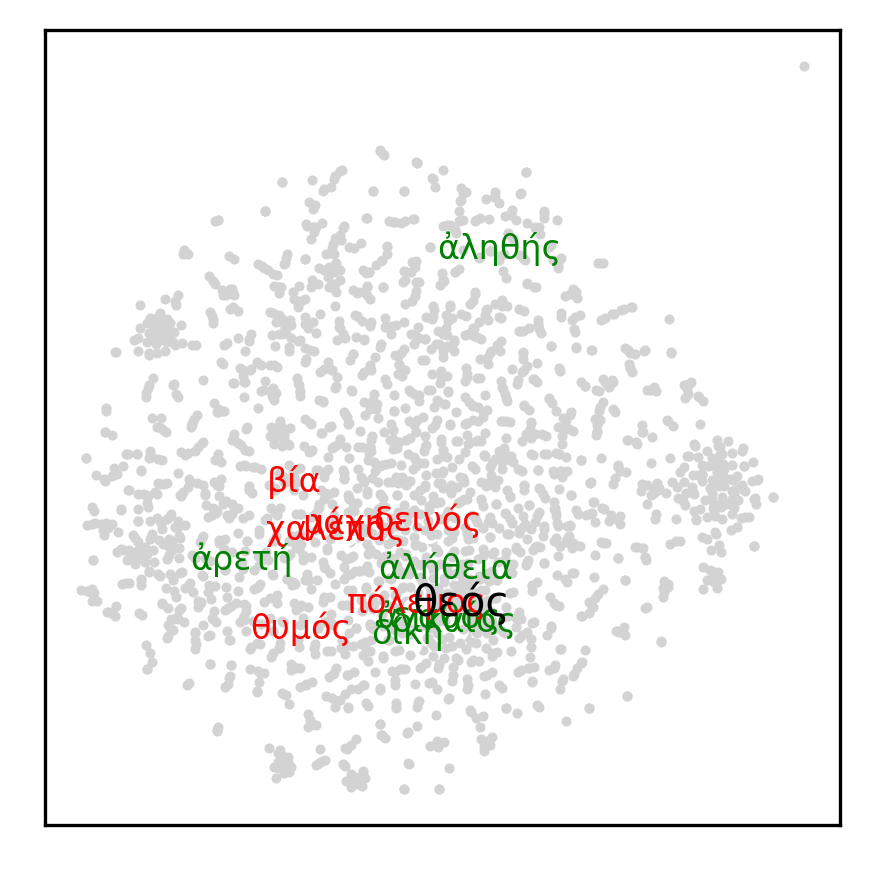

In [113]:
xs, ys, words = get_tsne_coors(data_arc[-2])

n = len(words)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

for x, y, word in zip(xs[:n], ys[:n], data.index[:n]):
    if word == "θεός":
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=10, color="black", zorder=4)
    elif word in morality:
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=8, color="green", zorder=3)
    elif word in impulsivity:
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=8, color="red", zorder=3)
    else:
        ax.scatter(x, y, s=2, color="lightgrey", zorder=1)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


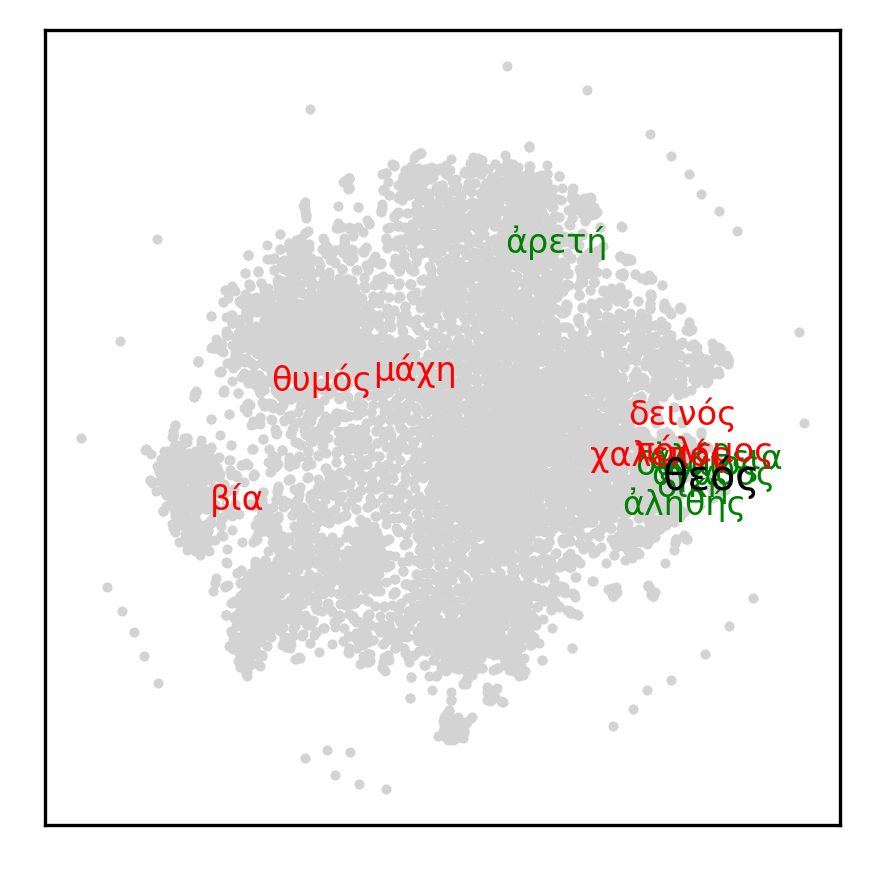

In [116]:
xs, ys, words = get_tsne_coors(data_cla[-2])

n = len(words)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

for x, y, word in zip(xs[:n], ys[:n], data.index[:n]):
    if word == "θεός":
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=10, color="black", zorder=4)
    elif word in morality:
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=8, color="green", zorder=3)
    elif word in impulsivity:
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=8, color="red", zorder=3)
    else:
        ax.scatter(x, y, s=2, color="lightgrey", zorder=1)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/kasev/theos/theos_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


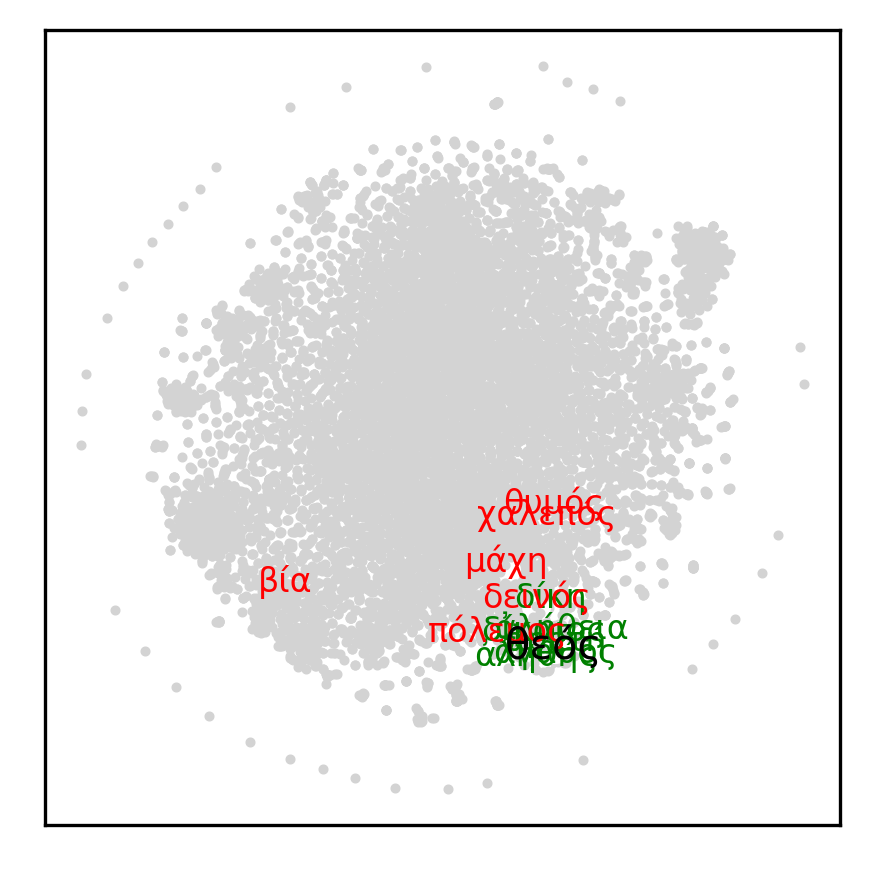

In [114]:
xs, ys, words = get_tsne_coors(data_chr[-2])

n = len(words)

fig, ax = plt.subplots(figsize=(3, 3), dpi=300, tight_layout=True)

for x, y, word in zip(xs[:n], ys[:n], data.index[:n]):
    if word == "θεός":
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=10, color="black", zorder=4)
    elif word in morality:
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=8, color="green", zorder=3)
    elif word in impulsivity:
        ax.scatter(x, y, color="white")# c=np.array([terms_by_col_dict[word]]))
        ax.text(x, y-0.003, word, horizontalalignment='center', fontsize=8, color="red", zorder=3)
    else:
        ax.scatter(x, y, s=2, color="lightgrey", zorder=1)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)